In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
#loading csv data
gold_data = pd.read_csv('/content/drive/MyDrive/gld_price_data.csv')

In [ ]:
#printing the first 5 rrows
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 991,Unnamed: 992,Unnamed: 993,Unnamed: 994,Unnamed: 995,Unnamed: 996,Unnamed: 997,Unnamed: 998,Unnamed: 999,Unnamed: 1000
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for col in gold_data.columns:
  if 'Unnamed' in col:
    del gold_data[col]

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
gold_data.shape

(2290, 6)

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
#checking the number of missing value
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
#compare the values for both transactions
gold_data.groupby('GLD').mean()

<ipython-input-37-b9a06831efdf>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gold_data.groupby('GLD').mean()


,SPX,USO,SLV,EUR/USD
GLD,,,,
70.000000,852.299988,45.750000,9.170000,1.245904
70.650002,908.109985,56.599998,9.380000,1.262993
71.099998,966.299988,52.490002,9.620000,1.261798
71.339996,968.750000,55.590000,9.580000,1.270196
71.709999,896.780029,54.930000,9.450000,1.294498
...,...,...,...,...
178.539993,1172.869995,34.849998,39.869999,1.368607
179.100006,1212.920044,34.439999,40.400002,1.443314
181.809998,1185.900024,34.459999,41.220001,1.390414


In [ ]:
legit_sample = legit.sample(n=492)

In [ ]:
corre=gold_data.corr()

<ipython-input-12-b459e99ba9e3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corre=gold_data.corr()


In [ ]:
print(corre['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


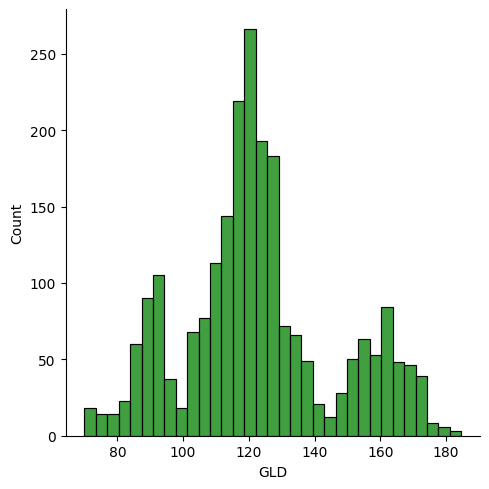

In [ ]:
#distribution of gold price
sns.displot(gold_data['GLD'],color='green')

In [ ]:
#splitting te features and target
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [ ]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [39]:
#splitting into training and texting data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [40]:
#model training using random forest regression
regre= RandomForestRegressor(n_estimators=100)

In [41]:
#training the model
regre.fit(X_train, Y_train)

RandomForestRegressor()

In [43]:
#prediction on test data
test_data_prediction = regre.predict(X_test)

In [44]:
print(test_data_prediction)

[168.73389971  82.19439979 116.03259999 127.51090093 120.62440127
 154.69279753 150.19159876 125.98770034 117.42879878 125.99670044
 116.58570091 171.46920056 141.06059912 167.95899839 115.43149975
 117.3784007  140.11990312 170.13120045 159.79980285 159.08559971
 155.10450019 125.38440021 175.40819973 157.91060354 125.16070053
  93.87299951  77.45140015 120.18680016 119.05959888 167.55269972
  88.09290035 125.41240006  91.28750076 117.61620008 121.05039917
 137.11860096 115.24210155 115.3115006  146.86220005 107.20480093
 104.45680255  87.38109801 126.53280047 117.94049982 153.55049902
 119.63509969 108.32519997 107.94349825  93.11260022 127.10449772
  75.18700027 113.82019928 121.46210026 111.17169913 118.73249898
 120.99559913 159.67229914 169.16260061 146.87169675  85.69299845
  94.47270041  86.81719938  90.58240029 118.94640048 126.46760076
 127.6212003  167.34489973 122.20049952 117.35819911  98.65190024
 167.67860169 143.14449788 131.62610265 121.20020242 121.1499991
 119.729100

In [46]:
# r square error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("r square error: ", error_score)

r square error:  0.9892424413017411
